In [1]:
clear()

In [2]:
print("\n... IMPORTS STARTING ...\n")
#importing all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import seaborn as sns
import math
import mpl_scatter_density
from sklearn.ensemble import HistGradientBoostingClassifier
#import jo_wilder # the API of this competition
print("\n... IMPORTS COMPLETE ...\n")


... IMPORTS STARTING ...


... IMPORTS COMPLETE ...



In [3]:
# for checking features properties during feature engineering
def check_features(features_df):
    fig, ax = plt.subplots(1, 2, figsize=(18,9))
    fig.tight_layout(pad=10.0)
    sns.boxplot(ax=ax[0], data=features_df, orient="h")
    sns.violinplot(ax=ax[1], data=features_df, orient="h")
    plt.show()

In [4]:
# convert features series into features datafame
def to_df(features_series): 
    features_df = pd.concat(features_series,axis=1)
    features_df = features_df.reset_index()
    features_df = features_df.set_index('session_id')
    return features_df

In [5]:
data = pd.read_csv("train.csv")
data

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22


C:\Users\diade\AppData\Local\Temp\ipykernel_29724\552774259.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)


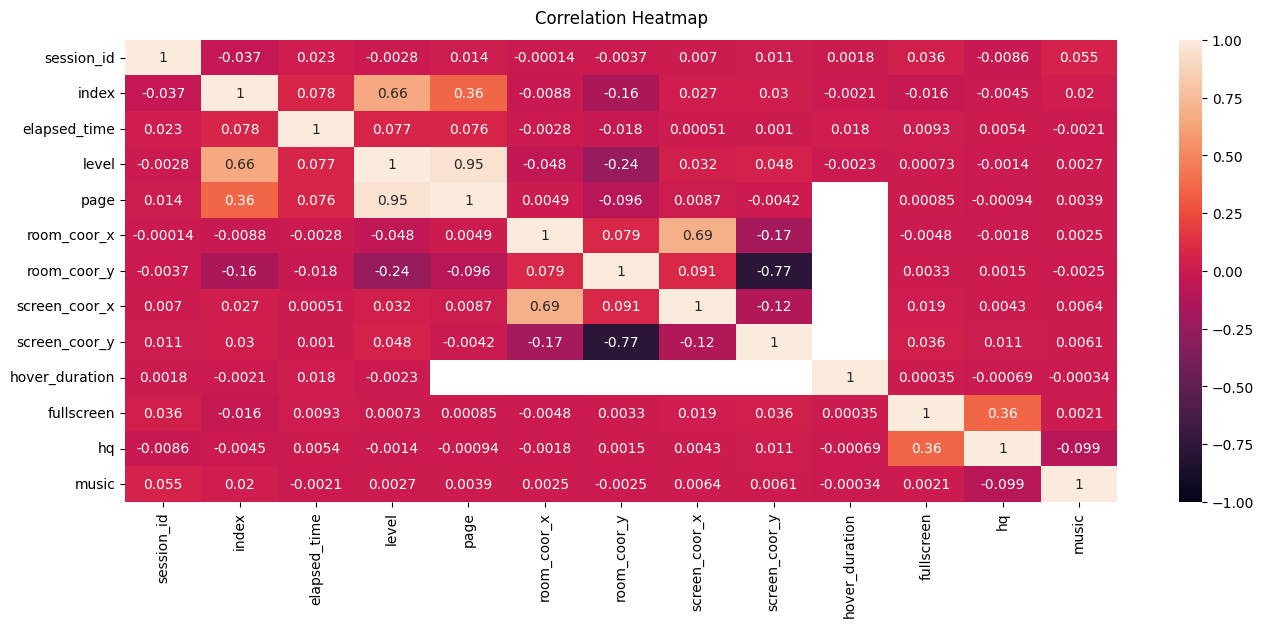

In [6]:
#Plot a heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [7]:
res = pd.read_csv("train_labels.csv")
res

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1
...,...,...
424111,22100215342220508_q18,1
424112,22100215460321130_q18,1
424113,22100217104993650_q18,1
424114,22100219442786200_q18,1


In [8]:
def percent_name(X):
    XX = []
    temp = X.groupby(by = ["session_id", "event_name"])["index"].count()
    total = X.groupby(by = ["session_id"])["index"].count()
    names = temp.index.get_level_values(1).unique()
    for name in names:
        temp_name = temp.loc[:, name] / total
        temp_name = temp_name.rename(f"{name}_pct")
        XX.append(temp_name)
    return XX

In [9]:
def compressive_stats_numerical_vars(X):
    XX = []
    temp = X.groupby(by = ["session_id"])["elapsed_time"].max() - X.groupby(by = ["session_id"])["elapsed_time"].min()
    temp = temp.rename("elapesed_duration")
    XX.append(temp)
    temp = X.groupby(by = ["session_id"])["hover_duration"].sum()
    temp = temp.rename("hover_duration_sum")
    XX.append(temp)
    temp = X.groupby(by = ["session_id"])["hover_duration"].mean().fillna(0)
    temp = temp.rename("hover_duration_mean")
    XX.append(temp)
    temp = X.groupby(by = ["session_id"])["hover_duration"].count()
    temp = temp.rename("hover_duration_count")
    XX.append(temp)
    return XX

In [10]:
def compressive_stats_categorical_vars(X, categorical_variables):
    XX = []
    for variable in categorical_variables:
        temp = X.groupby(by = ["session_id", variable])["index"].count()
        eles = temp.index.get_level_values(1).unique()
        for ele in eles:
            temp_by_ele = temp.loc[:, ele]
            temp_by_ele = temp_by_ele.rename(f"{variable}_{ele}_count")
            XX.append(temp_by_ele)
    return XX

In [11]:
def game_data(X):
    XX = []
    for game_config in ["fullscreen", "hq", "music"]:
        temp = X.groupby(by = ["session_id"])[game_config].first()
        temp.rename(game_config)
        XX.append(temp)
    return XX

In [12]:
def concat_features(X):
    X1 = percent_name(X)
    X2 =compressive_stats_numerical_vars(X)
    categorical_variables = ["page", "level", "event_name", "name"]
    X3 = compressive_stats_categorical_vars(X, categorical_variables)
    X4 = game_data(X)

    X_total = X1 + X2 + X3 + X4
    indepdent_varaibles = pd.concat(X_total,axis=1)
    indepdent_varaibles = indepdent_varaibles.reset_index()
    indepdent_varaibles = indepdent_varaibles.set_index('session_id')
    return indepdent_varaibles

In [13]:
train1 = data[data["level_group"] == "0-4"]
FEATURES1 = concat_features(train1)
print("\tFEATURES1 SUCCESSFULLY GENERATED")

train2 = data[data["level_group"] == "5-12"]
FEATURES2 = concat_features(train2)
print("\tFEATURES2 SUCCESSFULLY GENERATED")

train3 = data[data["level_group"] == "13-22"]
FEATURES3 = concat_features(train3)
print("\tFEATURES3 SUCCESSFULLY GENERATED")

print("\n...GENERATE FEATURES TABLES COMPLETE...")

del data, train1, train2, train3

	FEATURES1 SUCCESSFULLY GENERATED
	FEATURES2 SUCCESSFULLY GENERATED
	FEATURES3 SUCCESSFULLY GENERATED

...GENERATE FEATURES TABLES COMPLETE...


In [14]:
def get_dependent_variable_matrix(df):
    df["question"] = df["session_id"].str.split("_").str[1].str[1:].astype(int)
    df["session"] = df["session_id"].str.split("_").str[0]
    return df

TARGETS = get_dependent_variable_matrix(res)
print(f"The shape of TARGETS {TARGETS.shape}")
TARGETS

The shape of TARGETS (424116, 4)


,session_id,correct,question,session
0,20090312431273200_q1,1,1,20090312431273200
1,20090312433251036_q1,0,1,20090312433251036
2,20090312455206810_q1,1,1,20090312455206810
3,20090313091715820_q1,0,1,20090313091715820
4,20090313571836404_q1,1,1,20090313571836404
...,...,...,...,...
424111,22100215342220508_q18,1,18,22100215342220508
424112,22100215460321130_q18,1,18,22100215460321130
424113,22100217104993650_q18,1,18,22100217104993650
424114,22100219442786200_q18,1,18,22100219442786200


In [15]:
FEATURES1

,checkpoint_pct,cutscene_click_pct,map_click_pct,map_hover_pct,navigate_click_pct,notification_click_pct,object_click_pct,object_hover_pct,observation_click_pct,person_click_pct,...,event_name_notebook_click_count,name_basic_count,name_close_count,name_undefined_count,name_open_count,name_prev_count,name_next_count,fullscreen,hq,music
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0.006061,0.169697,0.012121,0.024242,0.490909,0.048485,0.066667,0.024242,0.024242,0.133333,...,NaN,74,6,85,NaN,NaN,NaN,0,0,1
20090312433251036,0.007194,0.258993,0.021583,0.021583,0.352518,0.035971,0.107914,0.035971,0.014388,0.129496,...,2.0,77,5,56,1.0,NaN,NaN,0,0,0
20090312455206810,0.006711,0.328859,0.013423,0.013423,0.382550,0.060403,0.067114,0.006711,NaN,0.120805,...,NaN,84,5,60,NaN,NaN,NaN,1,1,1
20090313091715820,0.005682,0.193182,0.011364,0.011364,0.454545,0.045455,0.102273,0.028409,0.011364,0.125000,...,2.0,84,6,85,1.0,NaN,NaN,1,1,1
20090313571836404,0.008929,0.232143,0.026786,0.017857,0.312500,0.071429,0.080357,0.044643,NaN,0.169643,...,4.0,62,8,40,2.0,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100215342220508,0.006667,0.193333,0.013333,0.020000,0.386667,0.060000,0.086667,0.053333,0.020000,0.140000,...,3.0,75,7,67,1.0,NaN,NaN,1,0,1
22100215460321130,0.006711,0.208054,0.013423,0.020134,0.335570,0.060403,0.127517,0.033557,0.006711,0.140940,...,7.0,80,9,57,3.0,NaN,NaN,0,0,1
22100217104993650,0.005076,0.142132,0.010152,NaN,0.527919,0.055838,0.076142,0.030457,0.020305,0.116751,...,3.0,76,9,111,1.0,NaN,NaN,0,0,1


In [16]:
FEATURES2

,checkpoint_pct,cutscene_click_pct,map_click_pct,map_hover_pct,navigate_click_pct,notification_click_pct,object_click_pct,object_hover_pct,observation_click_pct,person_click_pct,...,event_name_notebook_click_count,name_basic_count,name_close_count,name_undefined_count,name_open_count,name_prev_count,name_next_count,fullscreen,hq,music
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0.003378,0.040541,0.027027,0.030405,0.347973,0.030405,0.094595,0.070946,0.003378,0.351351,...,NaN,161,6,129,NaN,NaN,NaN,0,0,1
20090312433251036,0.002532,0.027848,0.040506,0.075949,0.291139,0.022785,0.187342,0.081013,0.007595,0.245570,...,7.0,229,11,152,3.0,NaN,NaN,0,0,0
20090312455206810,0.004082,0.053061,0.028571,0.065306,0.273469,0.036735,0.077551,0.040816,0.004082,0.391837,...,6.0,151,8,83,3.0,NaN,NaN,1,1,1
20090313091715820,0.003067,0.036810,0.027607,0.049080,0.312883,0.027607,0.131902,0.070552,0.012270,0.312883,...,5.0,182,10,132,2.0,NaN,NaN,1,1,1
20090313571836404,0.004132,0.045455,0.024793,0.012397,0.301653,0.037190,0.074380,0.061983,0.012397,0.396694,...,7.0,137,7,94,2.0,2.0,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100215342220508,0.003344,0.036789,0.023411,0.030100,0.270903,0.040134,0.140468,0.083612,0.010033,0.331104,...,9.0,173,7,112,1.0,3.0,3.0,1,0,1
22100215460321130,0.002618,0.028796,0.026178,0.054974,0.269634,0.023560,0.133508,0.094241,0.005236,0.340314,...,8.0,221,11,146,4.0,NaN,NaN,0,0,1
22100217104993650,0.002551,0.030612,0.020408,0.017857,0.288265,0.030612,0.191327,0.073980,0.002551,0.303571,...,15.0,223,14,148,7.0,NaN,NaN,0,0,1


In [17]:
FEATURES3

,checkpoint_pct,cutscene_click_pct,map_click_pct,map_hover_pct,navigate_click_pct,notification_click_pct,object_click_pct,object_hover_pct,observation_click_pct,person_click_pct,...,event_name_notebook_click_count,name_basic_count,name_close_count,name_undefined_count,name_next_count,name_open_count,name_prev_count,fullscreen,hq,music
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0.002381,0.142857,0.014286,0.033333,0.404762,0.023810,0.047619,0.030952,0.007143,0.292857,...,NaN,228,5,187,NaN,NaN,NaN,0,0,1
20090312433251036,0.000771,0.050116,0.034695,0.143408,0.491133,0.010794,0.063994,0.050887,0.003855,0.111796,...,50.0,504,39,733,1.0,19.0,1.0,0,0,0
20090312455206810,0.002747,0.159341,0.027473,0.032967,0.337912,0.016484,0.030220,0.035714,0.008242,0.277473,...,26.0,190,20,141,NaN,13.0,NaN,1,1,1
20090313091715820,0.002037,0.134420,0.014257,0.042770,0.476578,0.022403,0.036660,0.034623,0.008147,0.224033,...,2.0,227,7,256,NaN,1.0,NaN,1,1,1
20090313571836404,0.002551,0.140306,0.022959,0.025510,0.436224,0.020408,0.038265,0.028061,0.012755,0.272959,...,NaN,196,7,189,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100215342220508,0.002358,0.139151,0.016509,0.035377,0.398585,0.018868,0.051887,0.051887,0.009434,0.257075,...,8.0,214,11,195,NaN,4.0,NaN,1,0,1
22100215460321130,0.002203,0.154185,0.028634,0.094714,0.325991,0.017621,0.028634,0.026432,0.011013,0.297357,...,6.0,270,9,172,NaN,3.0,NaN,0,0,1
22100217104993650,0.001639,0.122951,0.013115,0.032787,0.455738,0.018033,0.032787,0.027869,0.006557,0.208197,...,49.0,260,27,300,2.0,19.0,2.0,0,0,1


In [18]:
import warnings
warnings.filterwarnings('ignore')
MODELS = {}
F1 = {}
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    #'criterion': ['gini', 'entropy', 'log_loss'],
    'loss': ['log_loss'],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    
}

for question in range(1, 19):
    print(f'\nTRAIN QUESTION {question} MODEL')
    
    if question <= 3:
        X = FEATURES1
    elif question <= 13:
        X = FEATURES2
    elif question <= 18:
        X = FEATURES3
    y = TARGETS[TARGETS["question"] == question]["correct"]
    #y = TARGETS['correct']

    aTreeClassifier = HistGradientBoostingClassifier(random_state=42, categorical_features = ['fullscreen', 'hq', 'music'])
    aTreeClassifier = GridSearchCV(
        aTreeClassifier, 
        parameters, 
        cv=2,
        scoring='f1')
    aTreeClassifier.fit(X, y)
    
    MODELS[f"question {question} model"] = aTreeClassifier
    F1[f"question {question} f1"] = aTreeClassifier.best_score_
    print(f"\tf1 score is {aTreeClassifier.best_score_:.3f}")
    print(f"\tbest params are {aTreeClassifier.best_params_}")
    print(f'QUESTION {question} MODEL COMPLETE')


TRAIN QUESTION 1 MODEL
	f1 score is 0.843
	best params are {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 1}
QUESTION 1 MODEL COMPLETE

TRAIN QUESTION 2 MODEL
	f1 score is 0.989
	best params are {'learning_rate': 0.001, 'loss': 'log_loss', 'max_depth': 1}
QUESTION 2 MODEL COMPLETE

TRAIN QUESTION 3 MODEL
	f1 score is 0.966
	best params are {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10}
QUESTION 3 MODEL COMPLETE

TRAIN QUESTION 4 MODEL
	f1 score is 0.890
	best params are {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 1}
QUESTION 4 MODEL COMPLETE

TRAIN QUESTION 5 MODEL
	f1 score is 0.708
	best params are {'learning_rate': 0.001, 'loss': 'log_loss', 'max_depth': 1}
QUESTION 5 MODEL COMPLETE

TRAIN QUESTION 6 MODEL
	f1 score is 0.875
	best params are {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 1}
QUESTION 6 MODEL COMPLETE

TRAIN QUESTION 7 MODEL
	f1 score is 0.848
	best params are {'learning_rate': 0.001, 'loss': 'log_loss', 'max_depth': 1}
QUES